In [12]:
import matplotlib
from sklearn.datasets import make_gaussian_quantiles
import matplotlib.pyplot as plt
from pandas import DataFrame
import numpy as np

In [13]:
AX1, AY1 = make_gaussian_quantiles(n_samples=40000,cov=2.5, n_features=2, n_classes=4)
# print (AX1) #n_samples numbers of 2D coordinates
# print (AY1) #The integer labels for quantile membership of each sample

In [14]:
AX2 = np.copy(AX1)
# print (AX2)
AX2[:,0] = np.interp(AX1[:,0], (np.min(AX1[:,0]), np.max(AX1[:,0])), (-15, 114))
AX2[:,1] = np.interp(AX1[:,1], (np.min(AX1[:,1]), np.max(AX1[:,1])), (-5, 109))
# print (AX2[:,1]) # y value of each coordinate

In [15]:
AX3 = AX2.reshape(200,200,2)
# print (AX3)
AY2 = AY1.reshape(200,200)
# print (AY2[0])

In [16]:
level00countD = np.zeros((200,200))
level25countD = np.zeros((200,200))
level50countD = np.zeros((200,200))
level75countD = np.zeros((200,200))

In [17]:
for i in range(200):
    for j in range(200):
        xval = int(np.floor(AX3[i][j][0]))
        yval = int(np.floor(AX3[i][j][1]))

        if (xval > 199 or yval > 199 or xval < 0 or yval < 0):
            continue;
        elif AY2[i][j] == 3:            
            level00countD[xval][yval] = level00countD[xval][yval] + 1;
        elif AY2[i][j] == 2:
            level25countD[xval][yval] = level25countD[xval][yval] + 1;
        elif AY2[i][j] == 1:
            level50countD[xval][yval] = level50countD[xval][yval] + 1;
        elif AY2[i][j] == 0:
            level75countD[xval][yval] = level75countD[xval][yval] + 1;

In [18]:
outD = np.zeros((100,100))

In [19]:
temp1 = []
temp2 = []
for i in range(0,100):
    for j in range(0,100):
            temp1.append(i)
            temp2.append(j)
            if level25countD[i][j] ==0 and level50countD[i][j] == 0 and level75countD[i][j] == 0:
                outD[i][j] = 0;
            elif level75countD[i][j] > 0:
                outD[i][j] = 0.75;
            elif level50countD[i][j] > 0:
                outD[i][j] = 0.5;
            elif level25countD[i][j] > 0:
                outD[i][j] = 0.25;

In [20]:
outD2= outD.reshape(10000)
dfD = DataFrame(dict(latitude = temp1, longitude = temp2, D = outD2))
dfD.to_csv(r'C:\Users\Phoenix\Desktop\Data Creation\Main Synthetic Data Analysis\Synthetic1.csv', index = False, header=True)

In [21]:
# import pandas as pd
# data = pd.read_csv(r'C:\Users\Phoenix\Desktop\Data Creation\Synthetic1.csv')
# a = np.array(data['D'])
# fig2 = plt.figure()
# plt.contour(a.reshape(100, 100), [0, 0.25, 0.5, 0.75])
# plt.savefig('Synthetic1.png')
# plt.close()

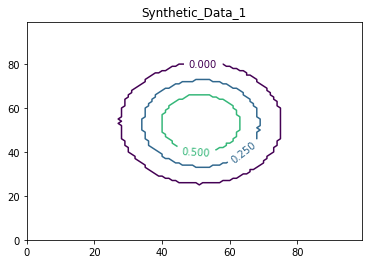

In [22]:
import pandas as pd
data = pd.read_csv(r'C:\Users\Phoenix\Desktop\Data Creation\Main Synthetic Data Analysis\Synthetic1.csv')
a = np.array(data['D'])
fig, ax = plt.subplots()
CS = ax.contour(a.reshape(100, 100), [0, 0.25, 0.5, 0.75])
ax.clabel(CS, inline=1, fontsize=10)
ax.set_title('Synthetic_Data_1')
plt.savefig('Synthetic_Data_1.png')